<h1 style="font-family:Impact,Arial;font-size:70px;">Math modeling </h1>
<h2 style="font-family:Arial;">Kimberly Le</h2>
<p><small> Classroom: Dante 215 <br>
Source(s): Eli Sylvia-Lourde, Lindsey Knudsen, Professor de Moor's code<br>
</small></p>
<p>
<small><font color=MediumVioletRed>knl2@stmarys-ca.edu</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# The Spread of Disease:

An isolated town has a population of 100,000 residents. Last week there were 18 new cases of 
people infected by a mild disease that lasts three weeks and leaves the person immune from 
further disease. Direct contact with an infected person leads to an infection of a previously 
uninfected person. This week there are 40 new cases. It is estimated that 30% of the existing	
population is immune because of previous exposure.

1. Make	a	list	of	assumptions	that	you	need	to	make in	order	to	develop	a	dynamical system	model	using	difference	equations.
2. Develop	a	model	that	describes	how	the	number	of	new	cases	each	week	develops.
3. What	is	the	eventual number	of	people	who	will	become	infected?
4. Vary	the	assumptions	you	make	in	this	model	to	develop	a	feel	for	how	sensitive	the	model	is	to	your	assumptions.


Mathematical model:<br>
$R_{n+1}=R_n+\Delta I_n$<br>
$S_{n+1}=S_n-kS_n\cdot I_n$ <br>
$I_{n+1}=I_n+kS_n\cdot I_n - \Delta I_{n-3}$<br>
<br>
Notations explained:
- R = "removed" population
- S = "susceptible" population
- I = "infected" population

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# variables using given information
population=100000
infected_initial=18
r_immune_initial=0.3*population
infected_one=40

duration=3

# keep track of the three populations: susceptible, infected, immune
# array made of zeros with weeks cells
weeks=12
susceptible=np.zeros(weeks+1)
infected=np.zeros(weeks+1)
infected_new=np.zeros(weeks+1)
removed=np.zeros(weeks+1)

# week one 
susceptible[0] = population - r_immune_initial - infected_initial
infected[0] = infected_initial
removed[0] = r_immune_initial

# use equations to find k rate (refer to the table de moor did in class)
infected_rate=infected_one/(infected_initial*susceptible[0])

for i in range (0, weeks):
    # at weeks 1 and 2, no one is immune yet
    if (i<duration-1):
        not_infectuous=0
    else:
        # at 3 weeks, the initial 18 ppl are now immune
        if (i==duration-1):
            not_infectuous=infected_initial
        # a new array for > 3 weeks?
        else:
            not_infectuous=infected_new[i-duration]
    
    # assuming that infected interacts with the susceptible, the newly infected > week 3
    # will be this equation
    infected_new[i]=infected_rate*infected[i]*susceptible[i]
    
    # if there are less people susceptible than infected, all of the susceptible become infected
    if (susceptible[i]<infected_new[i]):
        infected_new[i]=susceptible[i]
    
    # iteration for susceptible/infected/immune
    susceptible[i+1]=susceptible[i]-infected_new[i]
    infected[i+1]=infected[i]+infected_new[i]-not_infectuous
    removed[i+1]=removed[i]+not_infectuous

In [15]:
infected_rate

3.1754197111003146e-05

In [20]:
# table of results
data = {'Susceptible': susceptible, 
        'Infected': infected, 
        'Removed (Immune)':removed,}
df=pandas.DataFrame(data=data, 
                    index=[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13])
df

,Infected,Removed (Immune),Susceptible
1,18.000000,30000.000000,69982.000000
2,58.000000,30000.000000,69942.000000
3,186.815219,30000.000000,69813.184781
4,582.958710,30018.000000,69399.041290
5,1827.631138,30058.000000,68114.368862
6,5651.830550,30186.815219,64161.354231
7,16752.683042,30600.958710,52646.358248
8,43474.188489,31885.631138,24640.180373
9,64161.354231,35838.645769,0.000000
10,52646.358248,47353.641752,0.000000


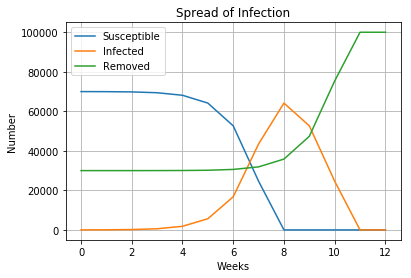

In [21]:
# Creating and displaying a plot
week = np.arange(0, weeks + 1, 1)

fig, ax = plt.subplots()
ax.plot(week, susceptible, label = "Susceptible")
ax.plot(week, infected, label = "Infected")
ax.plot(week, removed, label = "Removed")
ax.legend()

ax.set(xlabel='Weeks', ylabel='Number',
       title='Spread of Infection')
ax.grid()
fig.savefig("SpreadOfInfection.png")
plt.show()

# Results
What is the eventual number of people who will become infected?<br>

In [22]:
# find max number of people infected
df['Infected'].max()

64161.35423055316

In [25]:
# find what week
df['Infected'].idxmax()

9

The disease will reach its highest point of infected population in Week 8 with 64,161 people infected. By week 11, everyone who was not initially immune will have gotten the disease and recovered from it. Therefore, the entire population will have been immune.

# Sensitivity testing
1. Change the proportionality of interactions between infected and susceptiple populations. 
    - I believe you can change the proportionality by changing the initial infected and initial susceptiple numbers. With that, we are able to change the rate of infection and overall see the interaction between the variables besides a proportionality. 
2. Instead of assuming that the duration of the disease lasts for three weeks before one gets immune, we can fluctuate that number to two weeks and see the contagious population rather than the infected population.
3. Altering the infection rate reflects changes in the Week 1 and Week 2 infected population.  